# Test_new_alignment

In [1]:
import random
import numpy as np
import autograd.numpy as anp
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 0

import torch
import torch.nn as nn
import torch_geometric as tg
from torch_geometric.data import Data
import geotorch

import networkx as nx
import pymanopt
import pymanopt.manifolds
import pymanopt.optimizers

import local2global as l2g
import local2global.example as ex
import local2global_embedding
from local2global_embedding.network import tgraph, TGraph
from local2global_embedding.patches import create_patch_data
from local2global_embedding.clustering import louvain_clustering

import embedding as emb
import patches as pt
import network as ntw

from scipy.stats import ortho_group 
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix
from tqdm.notebook import tqdm

import new_alignment as na

2025-02-25 14:38:27.663148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
test_data = tg.datasets.Planetoid(name='Cora', root='/tmp/cora', split='full')[0]



In [6]:
dimensions=[2,4]
res_new_alignment, res_old_alignment, pr_error, new_emb, old_emb = na.test_new_vs_old(test_data, dimensions, device='cpu')

number of patches: 12
average patch degree: 3.6666666666666665


enlarging patch overlaps:   0%|          | 0/12 [00:00<?, ?it/s]

In [16]:
new_AUC=res_new_alignment['AUC']
new_AP=res_new_alignment['AP']
old_AUC=res_old_alignment['AUC']
old_AP=res_old_alignment['AP']
Losses_new_alignment_hist=res_new_alignment['Losses_hist']

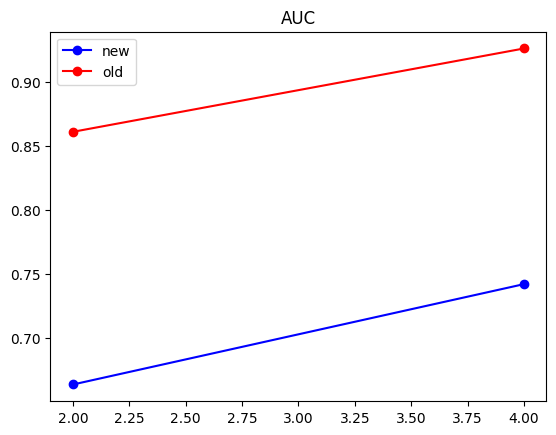

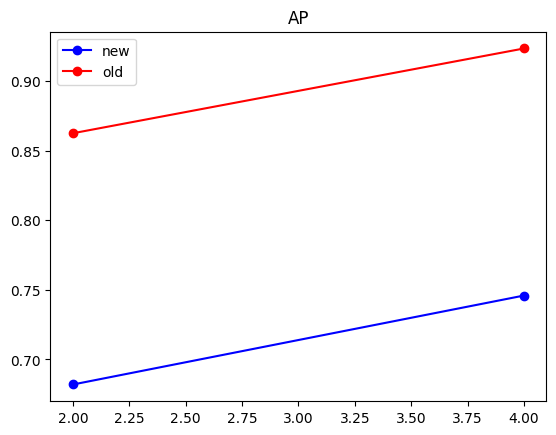

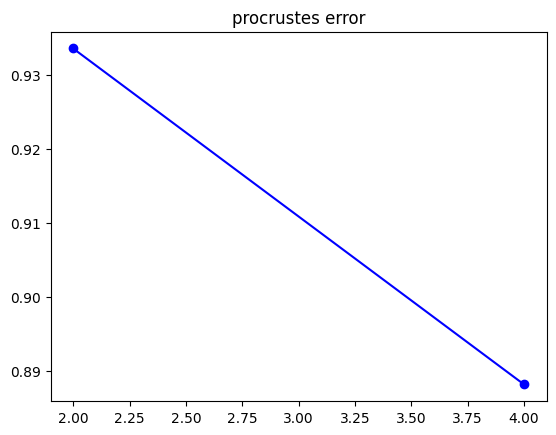

In [14]:
plt.title('AUC')
plt.plot(dimensions, new_AUC, linestyle='-', marker='o', color='b', label='new')
plt.plot(dimensions, old_AUC, linestyle='-', marker='o', color='r', label='old')
plt.legend()
plt.show()

plt.title('AP')
plt.plot(dimensions, new_AP, linestyle='-', marker='o', color='b', label='new')
plt.plot(dimensions, old_AP, linestyle='-', marker='o', color='r', label='old')
plt.legend()
plt.show()

plt.title('procrustes error')
plt.plot(dimensions, pr_error, linestyle='-', marker='o', color='b')
plt.show()

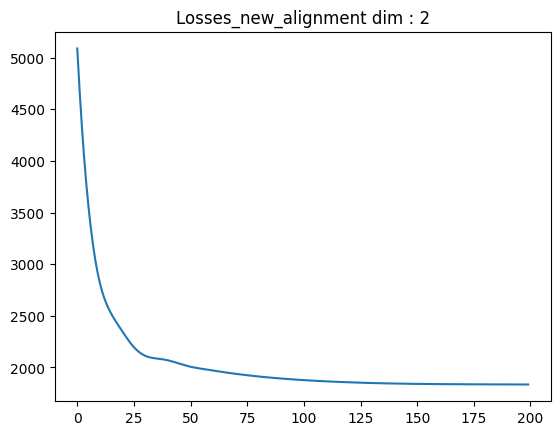

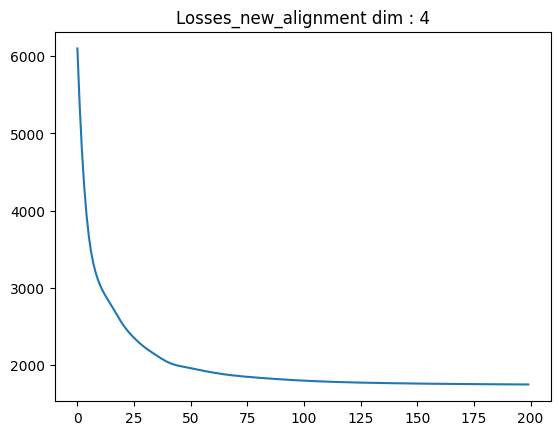

In [20]:
plt.title(f'Losses_new_alignment dim : {dimensions[0]}')
plt.plot(Losses_new_alignment_hist[0])
plt.show()

plt.title(f'Losses_new_alignment dim : {dimensions[1]}')
plt.plot(Losses_new_alignment_hist[1])
plt.show()

# HOW TO RUN NEW ALIGNMENT

In [3]:
patches, _ =na.prepare_test(test_data, min_overlap=100, target_overlap=200)
nodes = na.intersections_nodes(patches)


number of patches: 11
average patch degree: 3.909090909090909


enlarging patch overlaps:   0%|          | 0/11 [00:00<?, ?it/s]

In [5]:
n_patches=len(patches)
dim=2
patches_emb, _ =na.GAE_patch_embeddings(patches, dim=dim, num_epochs=200, device='cpu')

training patch with 2582 edges
epoch 0: loss=1.3861489295959473
epoch 1: loss=1.3834751844406128
epoch 2: loss=1.3765685558319092
epoch 3: loss=1.3641997575759888
epoch 4: loss=1.3456387519836426
epoch 5: loss=1.320871353149414
epoch 6: loss=1.2933919429779053
epoch 7: loss=1.2720367908477783
epoch 8: loss=1.2568156719207764
epoch 9: loss=1.2505426406860352
epoch 10: loss=1.2422981262207031
epoch 11: loss=1.2235617637634277
epoch 12: loss=1.1974024772644043
epoch 13: loss=1.1691100597381592
epoch 14: loss=1.1534132957458496
epoch 15: loss=1.1442210674285889
epoch 16: loss=1.1326549053192139
epoch 17: loss=1.1121381521224976
epoch 18: loss=1.082772970199585
epoch 19: loss=1.0640935897827148
epoch 20: loss=1.0517600774765015
epoch 21: loss=1.0472882986068726
epoch 22: loss=1.0641136169433594
epoch 23: loss=1.0272852182388306
epoch 24: loss=1.0134197473526
epoch 25: loss=1.0393637418746948
epoch 26: loss=1.0168906450271606
epoch 27: loss=1.0081787109375
epoch 28: loss=1.0131678581237793
e

In [7]:
emb_patches = na.preprocess_graphs(patches_emb, nodes)
                                

In [10]:
result, loss_hist=na.train_model(emb_patches, dim, n_patches , num_epochs=400, learning_rate=0.05)

Epoch 0, Loss: 5531.658203125
Epoch 10, Loss: 3420.49658203125
Epoch 20, Loss: 2654.513916015625
Epoch 30, Loss: 2357.41357421875
Epoch 40, Loss: 2201.98046875
Epoch 50, Loss: 2080.5537109375
Epoch 60, Loss: 2013.291015625
Epoch 70, Loss: 1988.41650390625
Epoch 80, Loss: 1973.6947021484375
Epoch 90, Loss: 1964.2994384765625
Epoch 100, Loss: 1958.4598388671875
Epoch 110, Loss: 1955.1583251953125
Epoch 120, Loss: 1953.364990234375
Epoch 130, Loss: 1952.2384033203125
Epoch 140, Loss: 1951.4217529296875
Epoch 150, Loss: 1950.77197265625
Epoch 160, Loss: 1950.216064453125
Epoch 170, Loss: 1949.717529296875
Epoch 180, Loss: 1949.2593994140625
Epoch 190, Loss: 1948.836181640625
Epoch 200, Loss: 1948.4442138671875
Epoch 210, Loss: 1948.0831298828125
Epoch 220, Loss: 1947.7509765625
Epoch 230, Loss: 1947.4483642578125
Epoch 240, Loss: 1947.173583984375
Epoch 250, Loss: 1946.926513671875
Epoch 260, Loss: 1946.70263671875
Epoch 270, Loss: 1946.5032958984375
Epoch 280, Loss: 1946.3255615234375
Epo

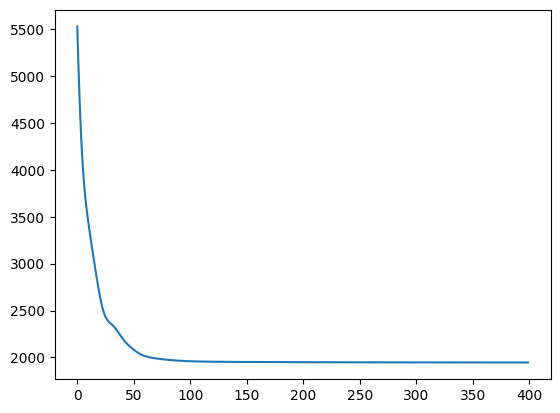

In [11]:
plt.plot(loss_hist)

In [14]:
new_emb=na.get_embedding(patches_emb, result)

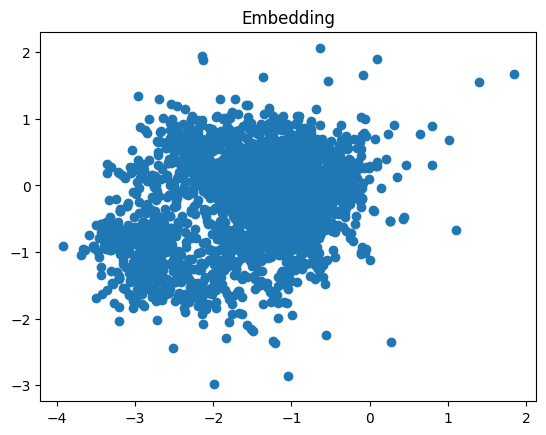

In [15]:
plt.title('Embedding')
plt.scatter(new_emb[:,0] ,new_emb[:,1])
plt.show()